# <a id="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")

## 1. <a id="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a id="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

### Essential credit card data terminology

#### Core Identification

- **Cardholder Name**: The full name of the person authorized to use the credit card.
- **Credit Card Number (PAN)**: The unique 15- or 16-digit number printed on the front of the card (Primary Account Number).
- **Expiration Date**: The month and year the card expires, after which it's no longer valid.
- **CVV (Card Verification Value)**: The 3-digit security code usually located on the back of the card (4-digits for American Express). This code is essential for online and phone purchases.
#### Financial Information

- **Credit Limit**: The maximum amount a cardholder can spend on the credit card.
- **Available Credit**: The remaining amount the cardholder can still spend.
- **Billing Cycle**: The period for which a credit card statement is generated (usually monthly).
- **Billing Statement**: A detailed summary of transactions, payments, fees, interest, and balances for a billing cycle.
- **Minimum Payment**: The smallest amount required to be paid each billing cycle to avoid late fees.
- **APR (Annual Percentage Rate)**: The yearly interest rate applied to outstanding balances.
#### Security and Authorization

- **EMV Chip**: A small computer chip embedded in cards (also called chip cards) that enhances transaction security.
- **Magnetic Stripe**: The dark strip on the back of traditional cards that stores card data.
- **PIN (Personal Identification Number)**: Sometimes used in conjunction with chip cards for additional security during transactions.
- **Address Verification Service (AVS)**: A fraud prevention system that checks whether the billing address provided matches the cardholder's address on file.
#### Important Notes

Protecting credit card data is crucial due to the risks of fraud and identity theft. Never share your complete credit card number, CVV, or PIN with anyone unless making an authorized transaction with a trusted merchant.
Many other terms are associated with credit card usage, such as various interest rates, fees, and rewards programs. Be sure to carefully review the terms and conditions of your specific credit card agreement.

### Explanation of the terms from a credit card data clustering dataset

**Customer Identification:**

* **CUST_ID:** This is a unique identifier for each customer in the dataset. It's likely anonymized to protect sensitive information.

**Balance and Usage:**

* **BALANCE:** The current outstanding amount owed on the credit card.
* **BALANCE_FREQUENCY:** A score (likely between 0 and 1) indicating how often the balance is updated/changes. A higher score suggests more frequent updates.
* **PURCHASES:** The total amount spent using the credit card for regular purchases.
* **ONEOFF_PURCHASES:** The total amount spent on single, large purchases.
* **INSTALLMENTS_PURCHASES:** The total amount spent on purchases made in installments (paying over time).
* **CASH_ADVANCE:** The total amount of cash withdrawn using the credit card (often incurs higher fees).
* **PURCHASES_FREQUENCY:** A score (likely between 0 and 1) indicating how frequently purchases are made using the card. 

**Transaction Details:**

* **ONEOFF_PURCHASES_FREQUENCY:** A score (likely between 0 and 1) indicating how often large, single purchases are made.
* **PURCHASES_INSTALLMENTS_FREQUENCY:** A score (likely between 0 and 1) indicating how often installment purchases are made.
* **CASH_ADVANCE_FREQUENCY:** A score (likely between 0 and 1) indicating how often cash advances are taken using the card.
* **CASH_ADVANCE_TRX:** The total number of cash advance transactions made.
* **PURCHASES_TRX:** The total number of purchase transactions made. 

**Account Information:**

* **CREDIT_LIMIT:** The maximum amount a customer is allowed to spend on the credit card.
* **PAYMENTS:** The total amount of money paid towards the credit card balance.
* **MINIMUM_PAYMENTS:** The minimum amount required to be paid each billing cycle to avoid late fees.
* **PRC_FULL_PAYMENT:** The percentage of times a customer pays the full balance due each month (likely a decimal between 0 and 1).
* **TENURE:** The length of time (in months) the customer has held the credit card account.

Understanding these terms allows you to analyze and group customers based on their credit card usage patterns and financial behavior. This can be valuable for various purposes, such as:

* **Identifying potential fraud:** Analyzing spending patterns can help detect unusual activity that might indicate fraudulent use.
* **Developing targeted marketing campaigns:** Based on spending habits, credit card companies can offer specific products or services to relevant customer segments.
* **Understanding customer preferences:** Analyzing usage patterns can provide insights into customer preferences and inform product development and marketing strategies.

## Investigation

In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [59]:
# round(df.isnull().sum(axis=0)*100/df.shape[0],2)
df.isnull().sum(axis=0).sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# feel free to investigate what you want
df.duplicated().sum()

0

In [8]:
df[df.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [9]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7723,C17930,427.642111,0.888889,0.00,0.00,0.0,2563.705644,0.00,0.00,0.0,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4345,C14467,4.054657,0.727273,264.02,264.02,0.0,0.000000,0.25,0.25,0.0,0.000000,0,4,7000.0,274.692435,55.272081,0.111111,12
7170,C17364,804.006538,1.000000,0.00,0.00,0.0,266.561781,0.00,0.00,0.0,0.083333,1,0,2500.0,226.212069,279.773547,0.000000,12
4001,C14114,4802.507595,1.000000,0.00,0.00,0.0,286.576749,0.00,0.00,0.0,0.083333,1,0,5000.0,986.609534,1852.577516,0.000000,12
1172,C11215,1393.527992,0.818182,0.00,0.00,0.0,1829.287087,0.00,0.00,0.0,0.083333,1,0,9000.0,638.403004,783.207678,0.000000,12


<AxesSubplot:>

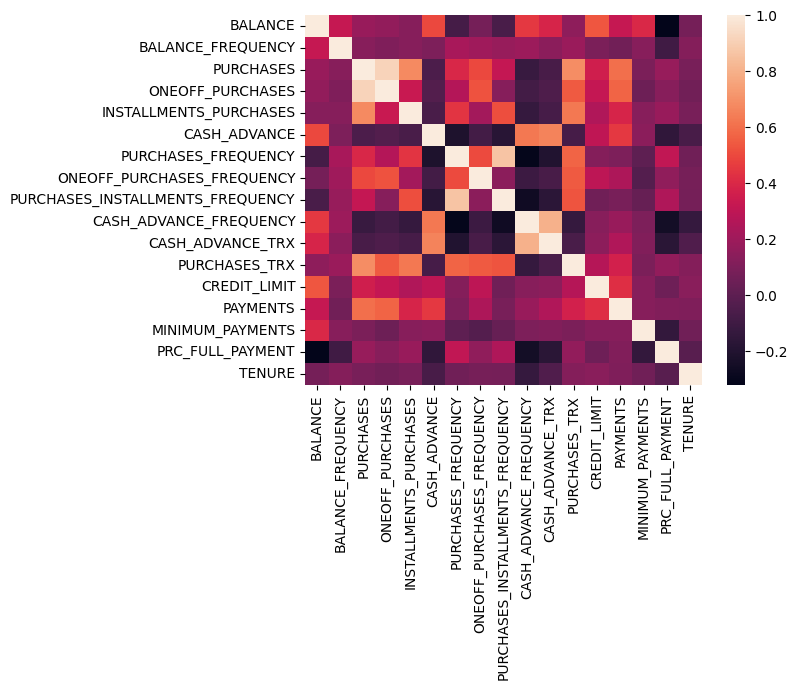

In [24]:
sns.heatmap(df.select_dtypes(include='number').corr())

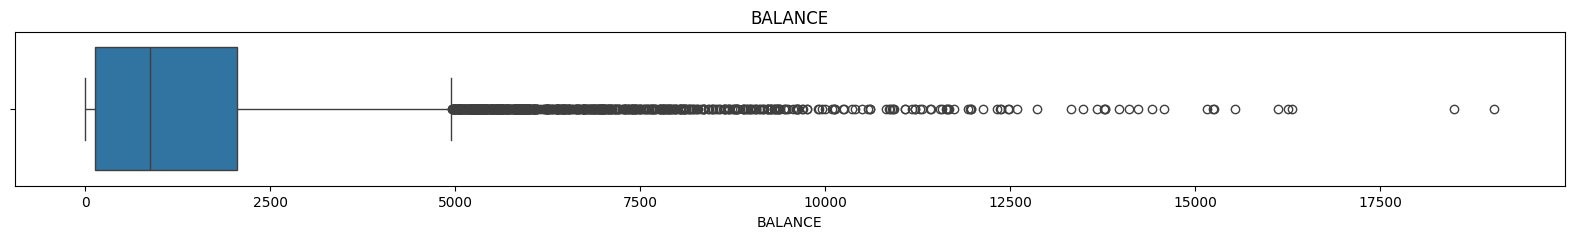

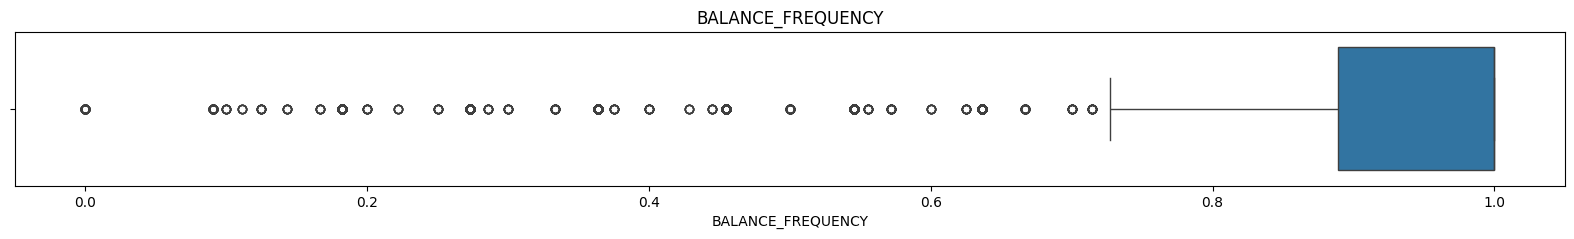

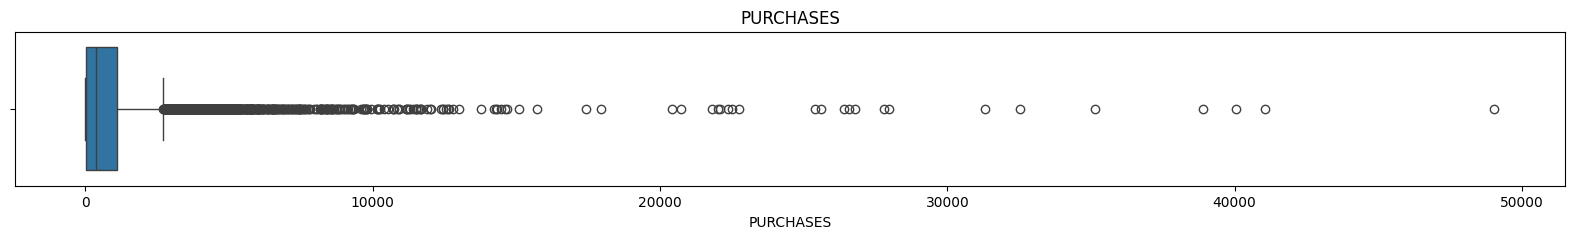

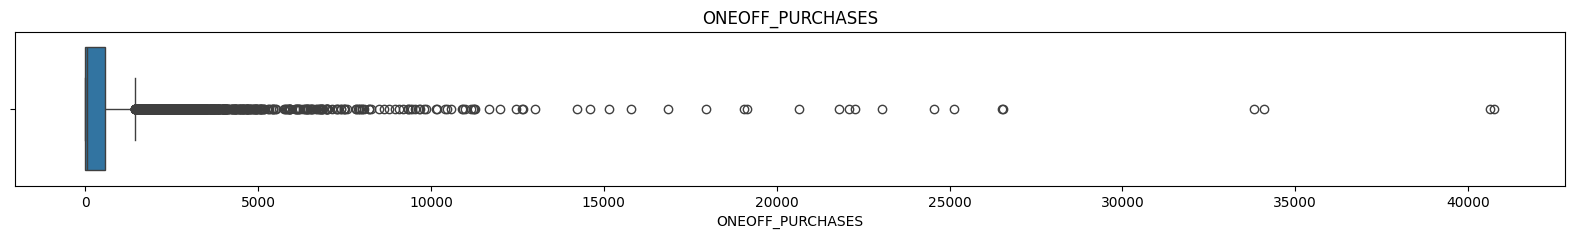

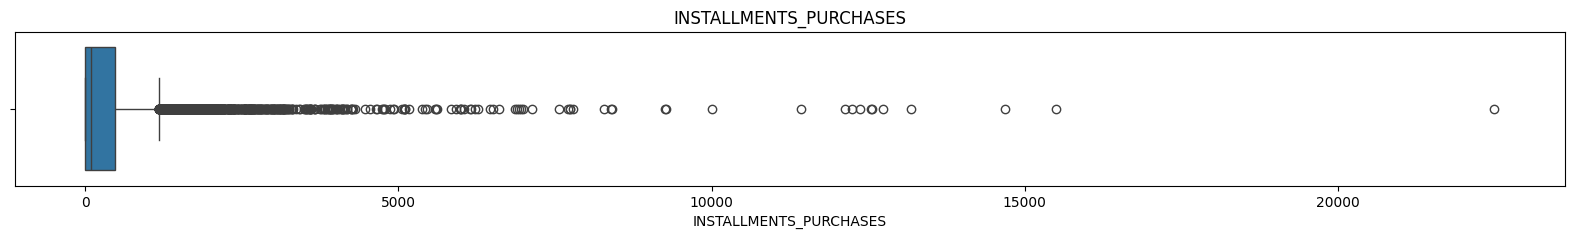

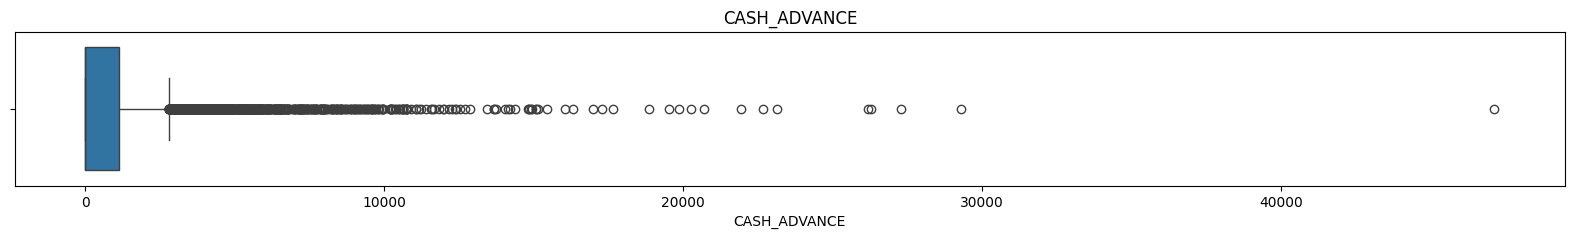

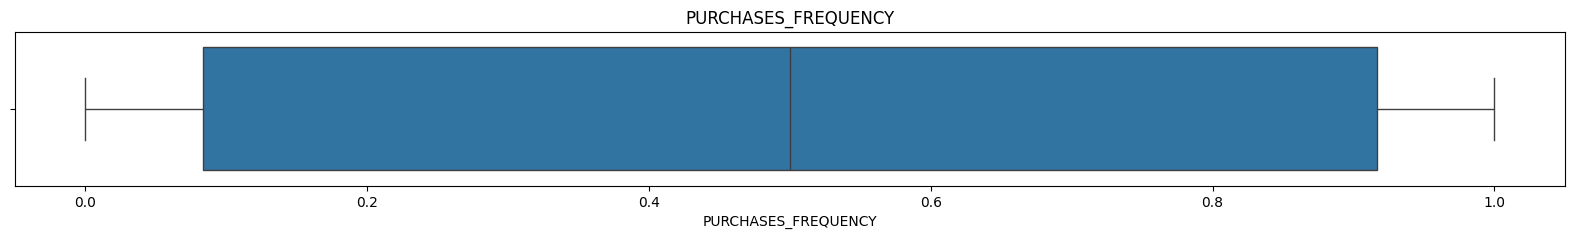

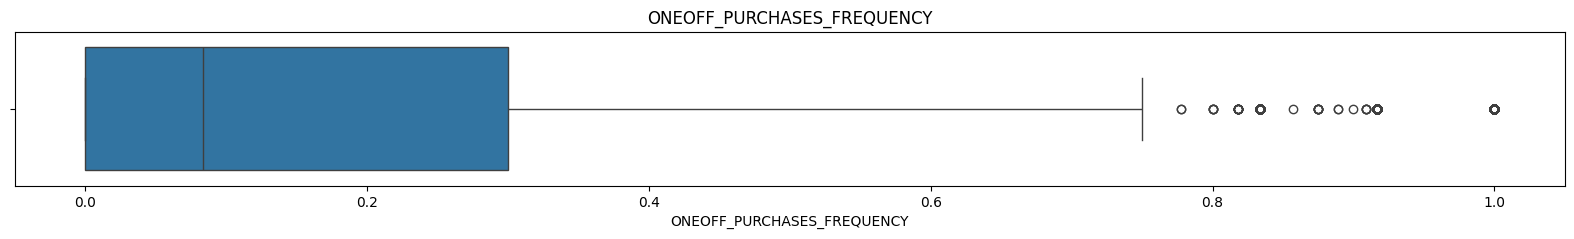

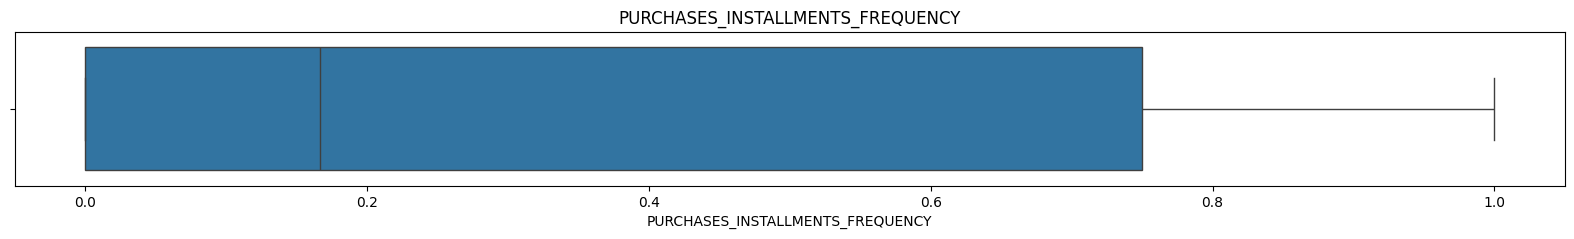

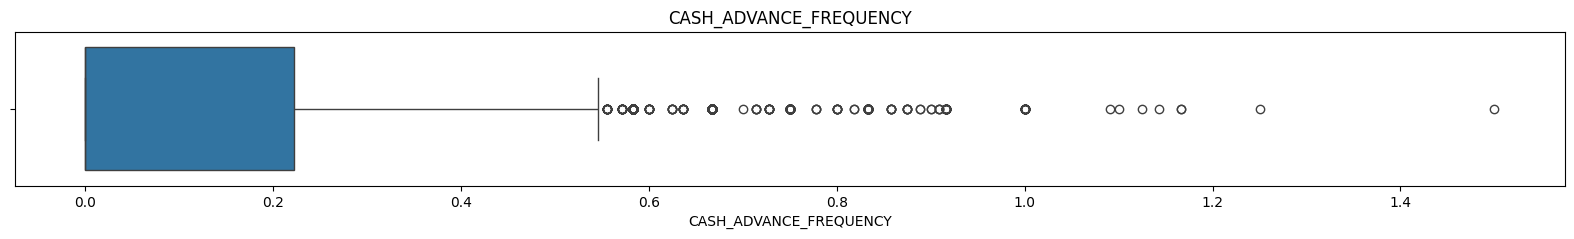

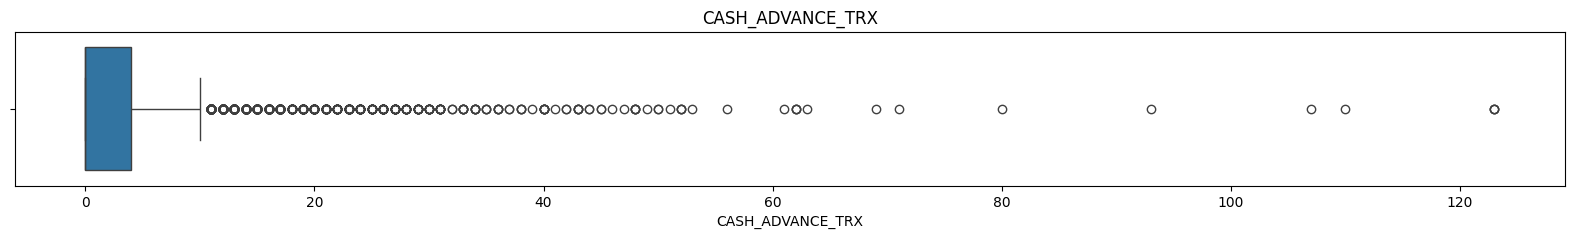

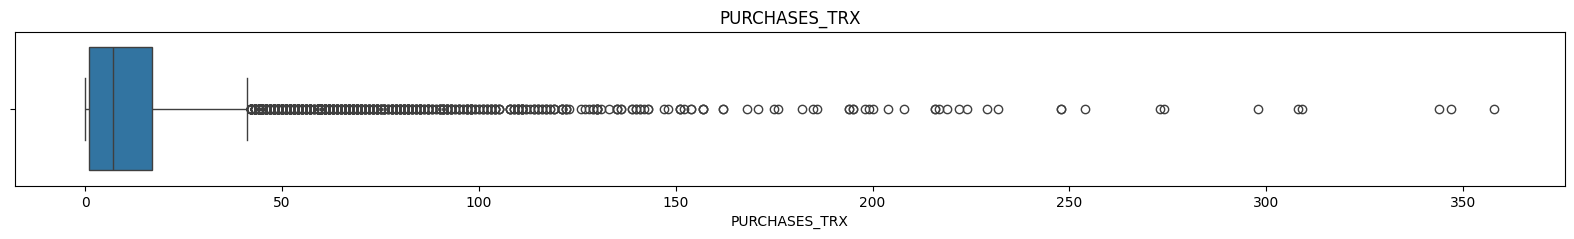

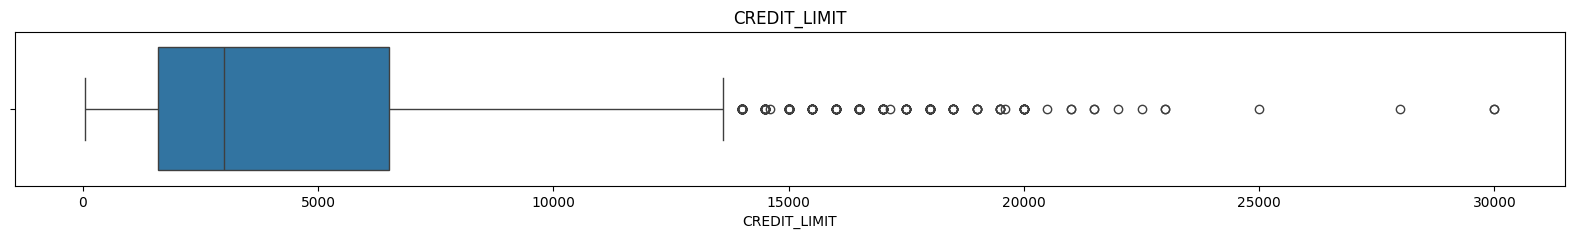

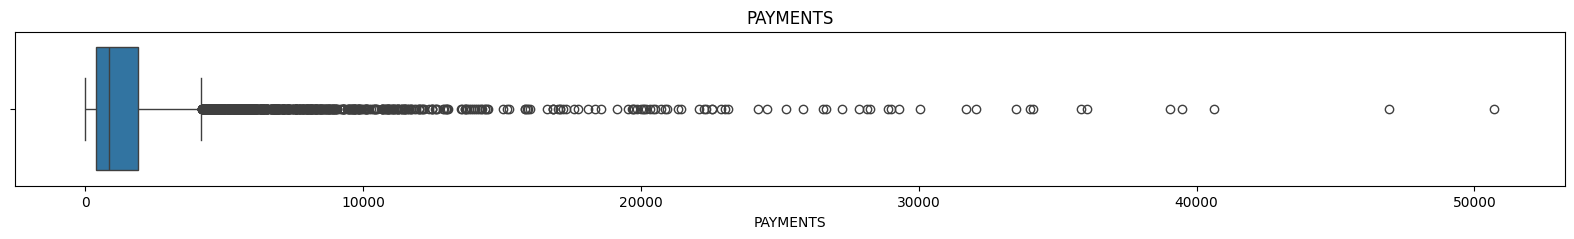

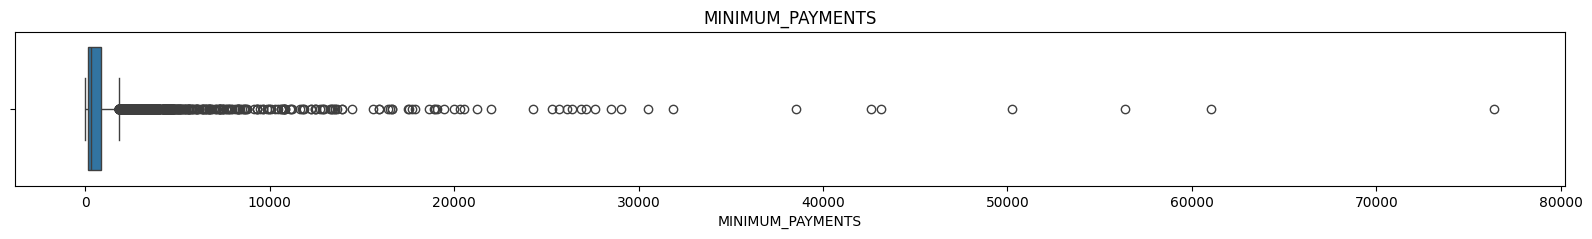

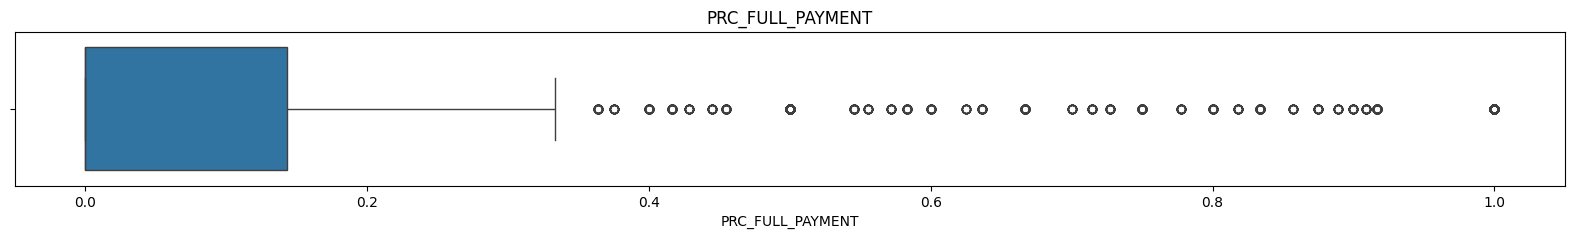

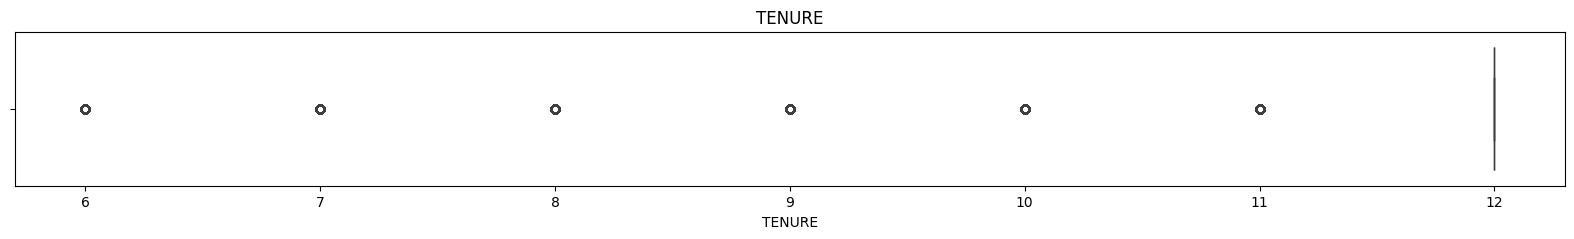

In [64]:
def PlotBoxs(df, figsize=(20, 5)):
    num_cols = df.select_dtypes(include='number').columns
    for col in num_cols:
        plt.figure(figsize=figsize)
        sns.boxplot(df, x=col)
        plt.title(col)
PlotBoxs(df, (20, 2))


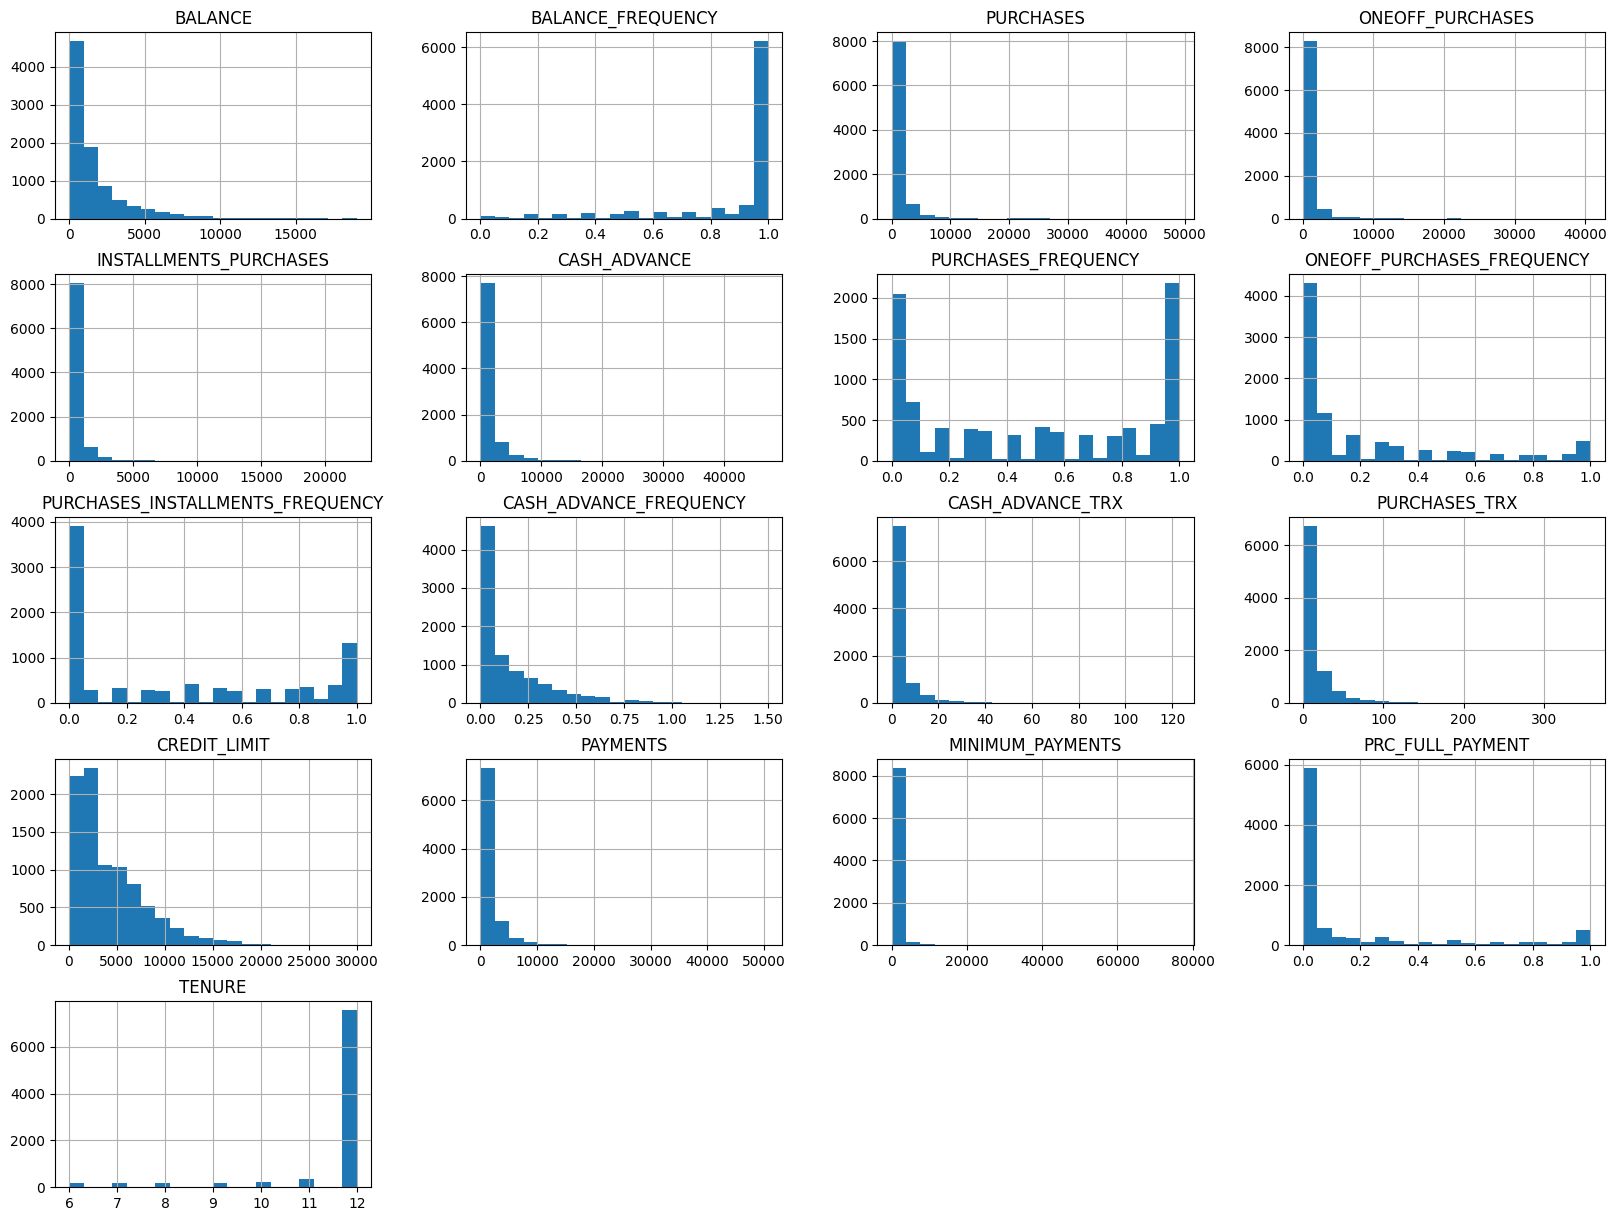

In [66]:
df.select_dtypes(include='number').hist(bins=20, figsize=(20, 15), layout=(5, 4));

## 3. <a id="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Null values in columns (CREDIT_LIMIT, MINIMUM_PAYMENTS)          <br>
2- Different Scales          <br>
3- Outliers          <br>

In [67]:
#make a copy for the original dataset
df_copy=df.copy()
df_copy.drop(columns=['CUST_ID'], inplace=True)

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

##### Handling the null value in credit limit
After investigation, we found that we can't estimate the credit limit from the given data as it's an internal process of the bank.

So we decided to remove the row containing the null in credit limit.

In [68]:
#solution 
df_copy = df_copy[df_copy['CREDIT_LIMIT'].notna()]

In [69]:
#test 
df_copy['CREDIT_LIMIT'].isna().sum()

0

##### Handling the null value in minimum payments
After investigation, we found that we can't estimate the minimum payments from the given data as there is missing data to calculate the minimum paymetents which is Minimum Payment Rate.

So we decided to impute this column with an Iterative imputer. (still experimental for the sake of reusability we will use KNNImputer)

In [70]:
null_index = df_copy[df_copy['MINIMUM_PAYMENTS'].isna()].index
null_index

Index([   3,   45,   47,   54,   55,   56,   63,   93,   94,   97,
       ...
       8753, 8755, 8803, 8838, 8854, 8919, 8929, 8935, 8944, 8946],
      dtype='int64', length=313)

In [73]:
df_copy.loc[null_index, ['BALANCE', "CREDIT_LIMIT","MINIMUM_PAYMENTS"]].sample(5)

,BALANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS
6775,12.423324,4000.0,NaN
3696,6727.925578,7000.0,NaN
5157,12.039121,1500.0,NaN
8755,3.036243,500.0,NaN
891,4007.029155,6500.0,NaN


In [74]:
#solution 
num_cols = df_copy.select_dtypes(include='number').columns
knn = KNNImputer()
df_copy[num_cols] = knn.fit_transform(df_copy[num_cols])

In [75]:
#test 
print(f"Null Count is the data : {df_copy.isna().sum().sum()}")
df_copy.loc[null_index, ['BALANCE', "CREDIT_LIMIT","MINIMUM_PAYMENTS"]].sample(5)

Null Count is the data : 0


,BALANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS
5321,0.000000,5000.0,72.356547
8561,3.229304,1500.0,49.304000
7401,1578.053342,1400.0,6109.090365
215,2.433254,7500.0,84.812913
1228,1.019189,15500.0,104.140749


In [76]:
num_cols = df_copy.select_dtypes(include='number').columns
tsne = TSNE()
df_2d = tsne.fit_transform(df_copy[num_cols])

In [87]:
df_2d

array([[-56.05544 ,  46.681774],
       [ 38.64325 ,  40.849056],
       [ 63.036728, -14.197111],
       ...,
       [-58.187992,  44.073647],
       [-39.81189 ,  74.54845 ],
       [-35.313725,  14.803186]], dtype=float32)

<AxesSubplot:>

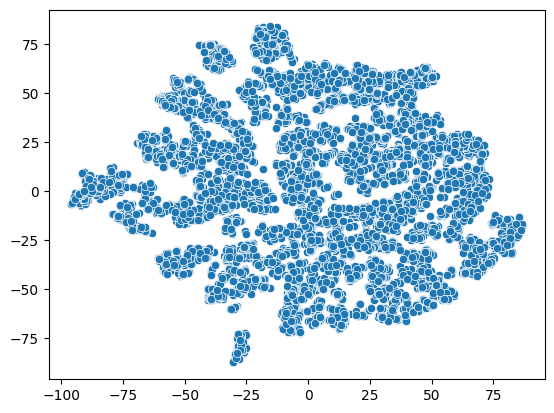

In [88]:
sns.scatterplot(x=df_2d[:, 0], y=df_2d[:, 1])

**Second issue**

we need to make the scale of the different columns in near ranges. While we are scaling the data we need to notice the outlier and consider them.
The outliers are necesary part of the data that we can't remove. So we need to handle them differentlly.

In [81]:
log_trans = df_copy + .001
log_trans = log_trans.apply(np.log)

<AxesSubplot:>

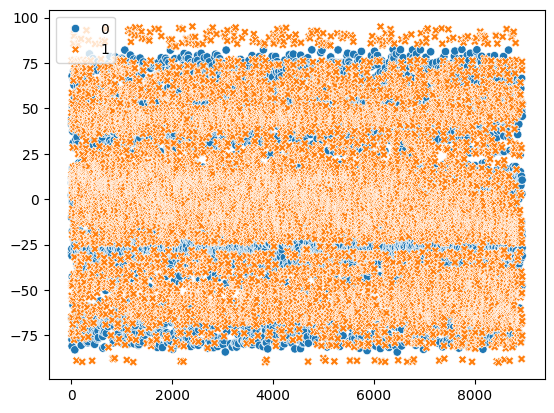

In [82]:
tsne_log = TSNE()
log_2d = tsne.fit_transform(log_trans[num_cols])

<AxesSubplot:>

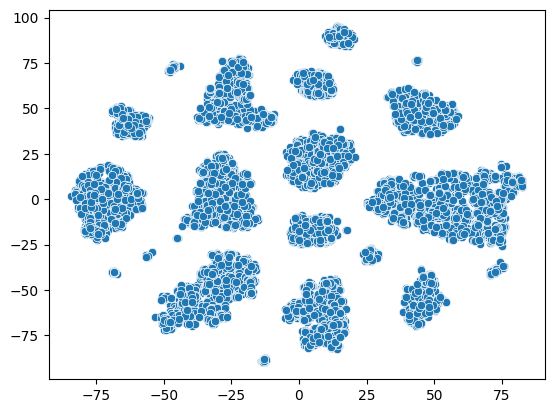

In [90]:
sns.scatterplot(x=log_2d[:, 0], y=log_2d[:,1])

## 4. <a id="4">Features transformation</a>
(<a href="#0">Go to top</a>)

In [97]:
robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(df_copy)
robust_df = pd.DataFrame(robust_df, index=df_copy.index, columns=df_copy.columns)

In [98]:
tsne_robust = TSNE()
robust_2d = tsne_robust.fit_transform(robust_df[num_cols])

<AxesSubplot:>

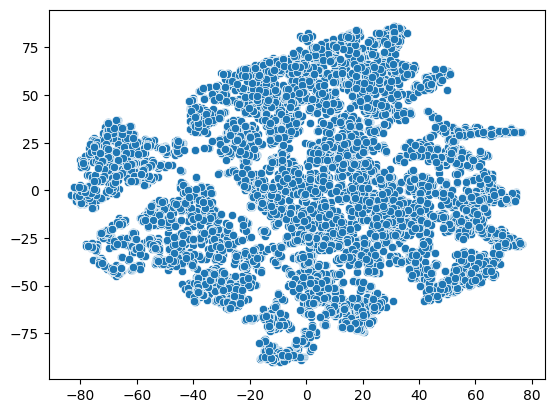

In [99]:
sns.scatterplot(x=robust_2d[:, 0], y=robust_2d[:, 1])

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

- log Transformation is the best transfomation on the data as when visualized with t-sne it gives us more seprable clusters.
- Standard and Min-Max scalers are not suitable at all for this data as the data contain extrem outliers, and these scalers doesn't perform well with them.
- Robust scaler is great with dealing with outliers, but when visualized with t-sne, the data wasn't cultered well.

**So We Go With Log Transformation**

## 5. <a id="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [108]:
def kMeansInitCentroids(X, K):
    np.random.shuffle(X)
    centroids = np.zeros((K, X.shape[1]))
    new = np.array_split(X, K)
    for i in range(K):
        centroids[i] = new[i].mean(axis=0)
    return centroids

def computeCentroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        c = X[idx == i].mean(axis=0)
        centroids[i] = c

    return centroids

def findClosestCentroids(X, centroids):
    cs = np.zeros((X.shape[0], centroids.shape[0]))

    for i in range(centroids.shape[0]):
        cs[:, i] = np.square(X - centroids[i]).sum(axis=1)

    idx = np.apply_along_axis(np.argmin, 1, cs)   
    
    return idx


In [109]:
def k_means(X,K):
    centroids = kMeansInitCentroids(X, K)

    for i in range(100):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [110]:
centroids, idx = k_means(np.array(log_trans), 4)

<AxesSubplot:>

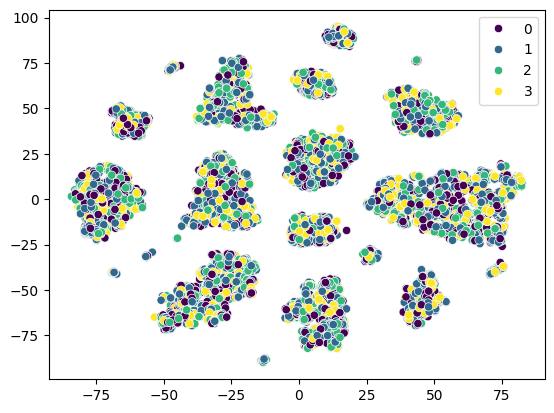

In [113]:
sns.scatterplot(x=log_2d[:, 0], y=log_2d[:,1], hue=idx, palette='viridis')

KMeans

## 6. <a id="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

## 6. <a id="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 